In [1]:
import jax

from catalax import Model, optimize, visualize
from utils import extract_data_from_enzymeml, create_title

jax.config.update("jax_enable_x64", True)

In [2]:
model = Model.load("./assets/model_07.json")
model

Model summary


Eq(x, Matrix([[s0, s1, s2, s3]]))

Eq(theta, Matrix([[k4, k3, K_p, k2, k_4b, kd, k6, K_s, k7]]))

Eq(Derivative(PGME, t), 0.0002*k3*(k2*s0/K_s + k_4b*s2/K_p)*exp(-kd*t)/((k3 + k4*s1/K_s + k6*s0/K_s)*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)) - (0.0002*k3 + 0.0002*k6*s0/K_s)*(k2*s0/K_s + k_4b*s2/K_p)*exp(-kd*t)/((k3 + k4*s1/K_s + k6*s0/K_s)*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)) - 0.0002*k2*s0*exp(-kd*t)/(K_s*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)))

Eq(Derivative(7 - ADCA, t), 0.0002*k3*(k2*s0/K_s + k_4b*s2/K_p)*exp(-kd*t)/((k3 + k4*s1/K_s + k6*s0/K_s)*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)) + k7*s2 - 0.0002*k2*s0*exp(-kd*t)/(K_s*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)))

Eq(Derivative(CEX, t), -0.0002*k3*(k2*s0/K_s + k_4b*s2/K_p)*exp(-kd*t)/((k3 + k4*s1/K_s + k6*s0/K_s)*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)) - k7*s2 + 0.0002*k2*s0*exp(-kd*t)/(K_s*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)))

Eq(Derivative(PG, t), k7*s2 + (0.0002*k3 + 0.0002*k6*s0/K_s)*(k2*s0/K_s + k_4b*s2/K_p)*exp(-kd*t)/((k3 + k4*s1/K_s + k6*s0/K_s)*(1 + k2*s0*(1 + s0/K_s)/(K_s*(k3 + k4*s1/K_s + k6*s0/K_s)) + s3/K_s + s0**2/K_s**2 + s2/K_p)))

,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,k4,k4,569.470215,False,None,None,None,NaN
1,k3,k3,57.181374,False,None,None,None,NaN
2,K_p,K_p,11.286667,False,None,None,None,NaN
3,k2,k2,1205.054199,False,None,None,None,NaN
4,k_4b,k_4b,1803.381348,False,None,None,None,NaN
5,kd,kd,0.001474,False,None,None,None,NaN
6,k6,k6,397.794525,False,None,None,None,NaN
7,K_s,K_s,20.253098,False,None,None,None,NaN
8,k7,k7,0.000159,False,None,None,None,0.02


In [3]:
# Extract data from EnzymeML
species_mapping = {
    "s0": "s0",
    "s1": "s1",
    "s2": "s2",
    "s3": "s3",
}

initial_conditions, times, data = extract_data_from_enzymeml(
    path="./data/Model_4.omex",
    model=model,
    species_mapping=species_mapping,
)

# Remove the high PGME data
initial_conditions = initial_conditions
data = data
times = times

In [4]:
# Perform the optimization
result, new_model = optimize(
    model,
    initial_conditions[0:-1],
    data[0:-1],
    times[0:-1],
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="bfgs"
)

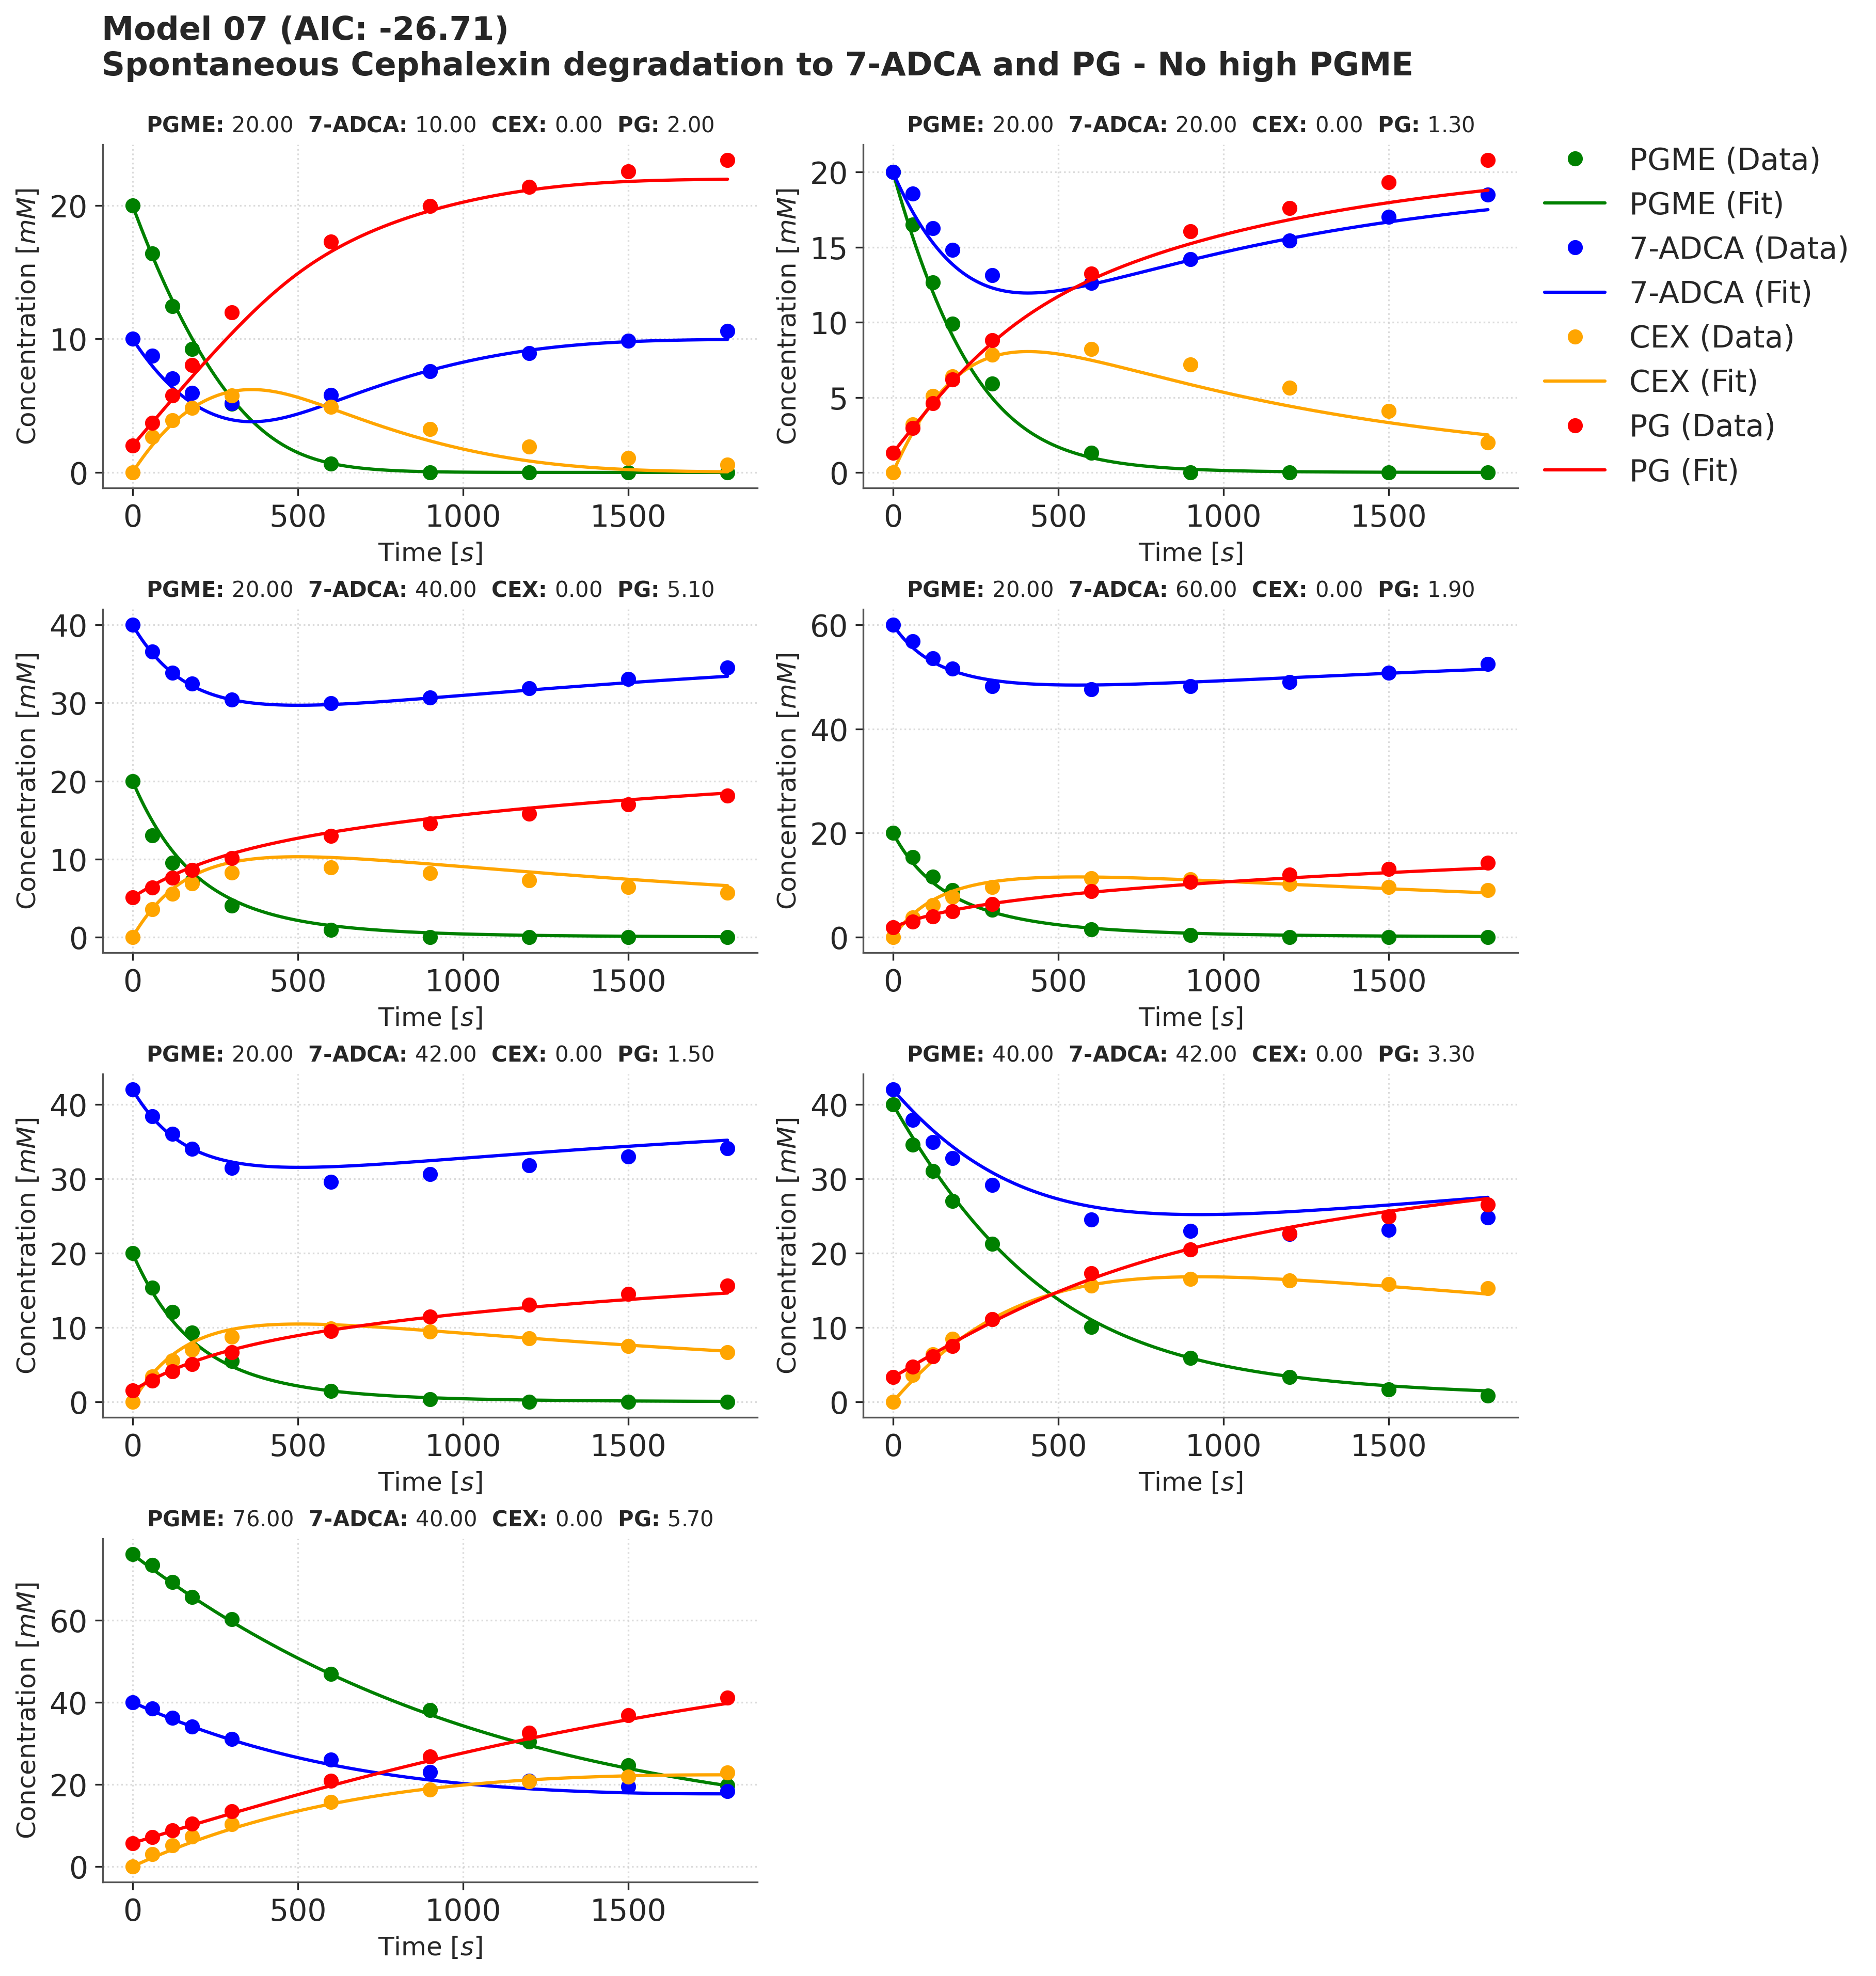

In [5]:
# Visualize the results
aic = new_model.calculate_aic(data[0:-1], initial_conditions[0:-1], times[0:-1]) / data[0:-1].shape[-1]
f = visualize(
    model=new_model,
    data=data[0:-1],
    times=times[0:-1],
    initial_conditions=initial_conditions[0:-1],
    colors={"s0": "green", "s1": "blue", "s2": "orange", "s3": "red"},
    heading_fontsize=10,
    save="./plots/model_07_no_high_pgme_fit",
    title=create_title(
        model_name="Model 07",
        aic=aic,
        sub="Spontaneous Cephalexin degradation to 7-ADCA and PG - No high PGME",
    ),
)

In [6]:
# Perform the optimization
result, new_model = optimize(
    model,
    initial_conditions,
    data,
    times,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="bfgs"
)

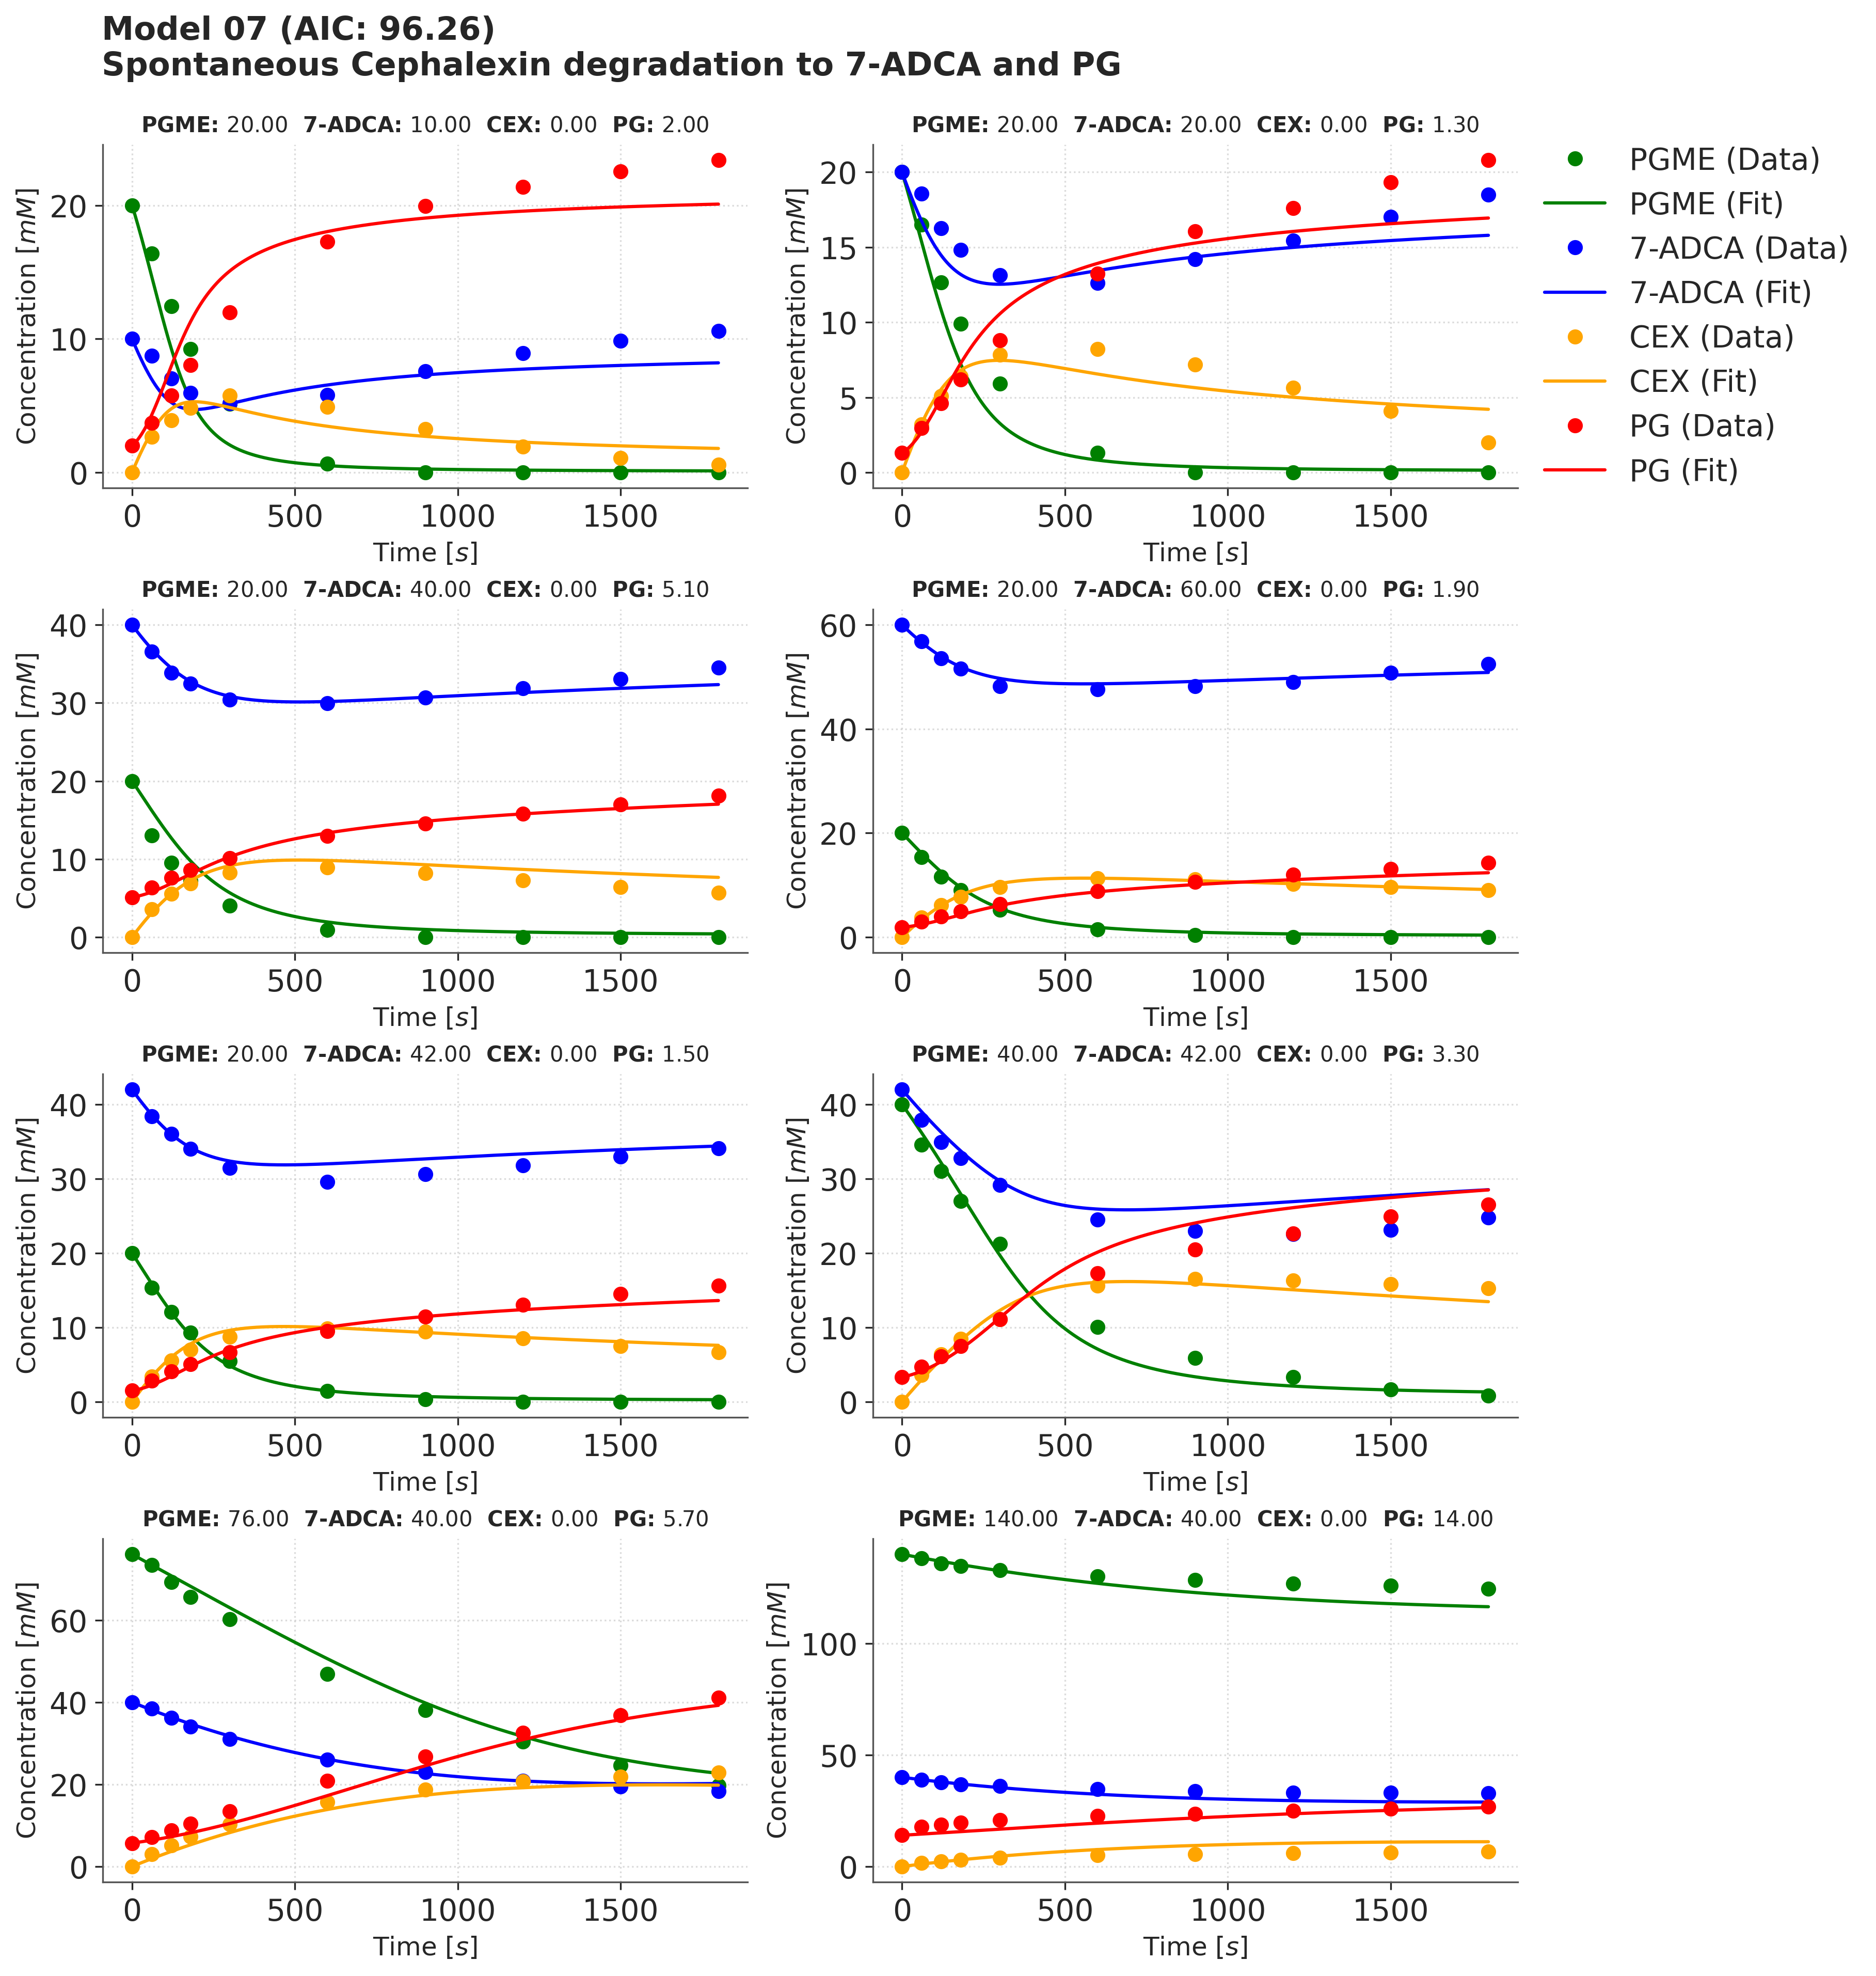

In [7]:
# Visualize the results
aic = new_model.calculate_aic(data, initial_conditions, times) / data.shape[-1]
f = visualize(
    model=new_model,
    data=data,
    times=times,
    initial_conditions=initial_conditions,
    colors={"s0": "green", "s1": "blue", "s2": "orange", "s3": "red"},
    heading_fontsize=10,
    save="./plots/model_07_fit",
    title=create_title(
        model_name="Model 07",
        aic=aic,
        sub="Spontaneous Cephalexin degradation to 7-ADCA and PG",
    ),
)